<a href="https://colab.research.google.com/github/Lizeth-Buitrago/Computacion__alto_desempenio_Big_Data/blob/main/Actividad_6_Gestion_archivos_anslisis_datos__Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Agregar Disco Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Crear variable datos con el dataset

import pandas as pd
datos = pd.read_csv('/content/drive/MyDrive/data.csv')

In [3]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("✓ Librerías cargadas correctamente")

✓ Librerías cargadas correctamente


In [4]:
#Validación variables
print(f"Dataset cargado: {len(datos)} registros")
print(f"Columnas: {list(datos.columns)}")

Dataset cargado: 100000 registros
Columnas: ['first_name', 'last_name', 'gender', 'city_name', 'department_name', 'id_branch', 'medicine_type', 'medicine_quantity', 'systolic_pressure', 'diastolic_pressure']


In [5]:
# Exploración incial
print("=== PRIMERAS 10 FILAS ===")
print(datos.head(10))

print("\n=== INFORMACIÓN DEL DATASET ===")
print(datos.info())

print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(datos.describe())

=== PRIMERAS 10 FILAS ===
  first_name last_name gender              city_name department_name  \
0     Meagan   Swanson      f                  Neiva           Huila   
1   Jennifer   Hancock      f                  Tunja          Boyaca   
2    Dorothy   Brumley      f                Popayan           Cauca   
3  Stephanie      Lamb      f                 Bogota    Cundinamarca   
4      Keith    Wright      m  San Jose del Guaviare        Guaviare   
5       Paul   Alberts      m                Pereira       Risaralda   
6    Timothy    Bowman      m                  Tunja          Boyaca   
7     Robert   Catalan      m            Bucaramanga       Santander   
8     Cheryl      Mink      f              Florencia         Caqueta   
9      Scott  Marshall      m                  Pasto          Narino   

   id_branch  medicine_type  medicine_quantity  systolic_pressure  \
0         17             15                229                148   
1          6              7                

In [6]:
# Medidas de tendencia central
print("=== PRESIÓN SISTÓLICA ===")
print(datos['systolic_pressure'].describe())

print("\n=== PRESIÓN DIASTÓLICA ===")
print(datos['diastolic_pressure'].describe())

=== PRESIÓN SISTÓLICA ===
count    100000.000000
mean        128.615920
std          59.282822
min           5.000000
25%         100.000000
50%         125.000000
75%         155.000000
max         300.000000
Name: systolic_pressure, dtype: float64

=== PRESIÓN DIASTÓLICA ===
count    100000.000000
mean         80.582730
std          36.824968
min           5.000000
25%          65.000000
50%          77.000000
75%          92.000000
max         200.000000
Name: diastolic_pressure, dtype: float64


<Figure size 1200x700 with 0 Axes>

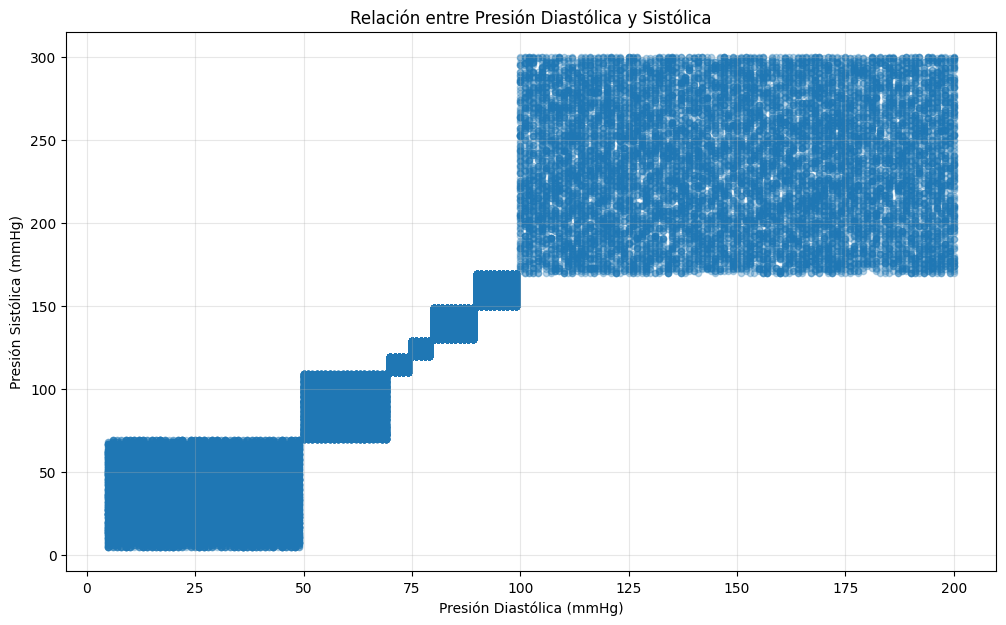

In [7]:
#Gráfica de dispersión
plt.figure(figsize=(12, 7))
datos.plot("diastolic_pressure", "systolic_pressure",
           kind="scatter", alpha=0.3, figsize=(12, 7))
plt.title('Relación entre Presión Diastólica y Sistólica')
plt.xlabel('Presión Diastólica (mmHg)')
plt.ylabel('Presión Sistólica (mmHg)')
plt.grid(True, alpha=0.3)
plt.show()

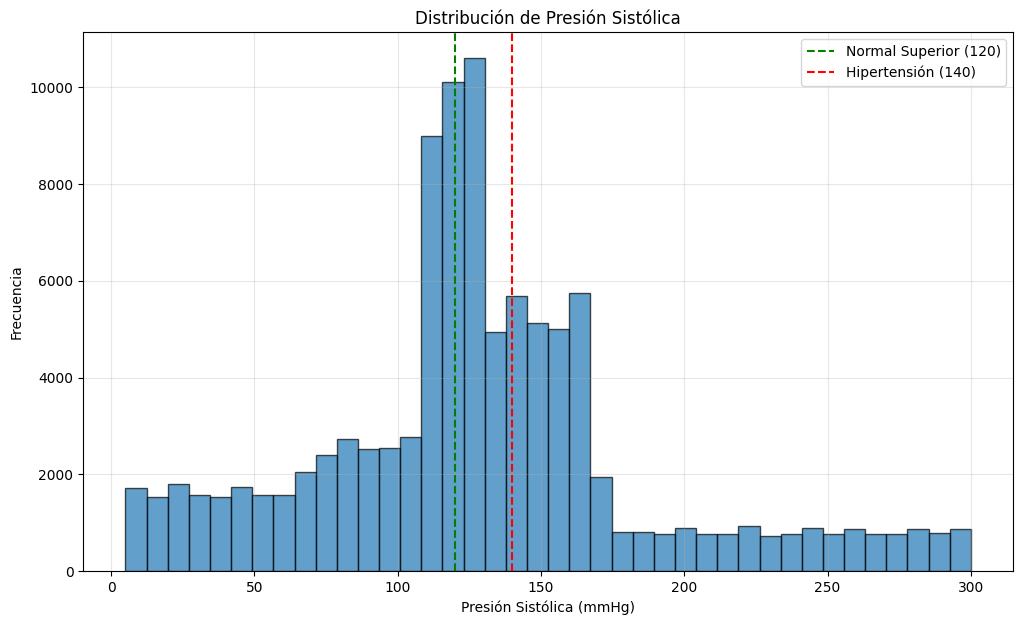

In [8]:
#Histograma
systole = np.array(datos['systolic_pressure'])

plt.figure(figsize=(12, 7))
plt.hist(systole, bins=40, edgecolor='black', alpha=0.7)
plt.title('Distribución de Presión Sistólica')
plt.xlabel('Presión Sistólica (mmHg)')
plt.ylabel('Frecuencia')
plt.axvline(120, color='green', linestyle='--', label='Normal Superior (120)')
plt.axvline(140, color='red', linestyle='--', label='Hipertensión (140)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1000x700 with 0 Axes>

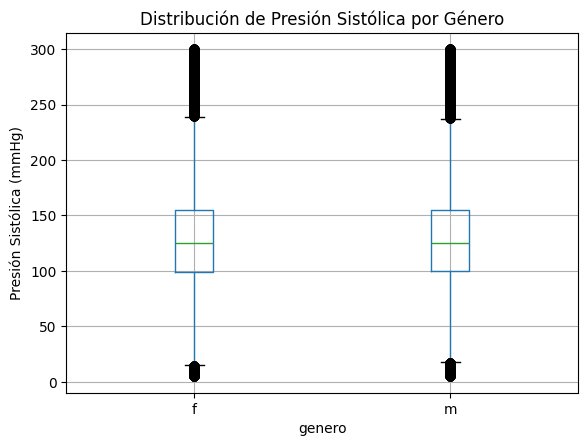


=== ESTADÍSTICAS POR GÉNERO ===
          count        mean        std  min    25%    50%    75%    max
genero                                                                 
f       49962.0  128.464753  59.131902  5.0   99.0  125.0  155.0  300.0
m       50038.0  128.766857  59.433337  5.0  100.0  125.0  155.0  300.0


In [9]:
#Boxplot por género
genero = np.array(datos['gender'])
df = pd.DataFrame({'genero': genero, 'systolica': systole})

plt.figure(figsize=(10, 7))
df.boxplot(column=['systolica'], by='genero')
plt.title('Distribución de Presión Sistólica por Género')
plt.suptitle('')
plt.ylabel('Presión Sistólica (mmHg)')
plt.show()

print("\n=== ESTADÍSTICAS POR GÉNERO ===")
print(df.groupby('genero')['systolica'].describe())

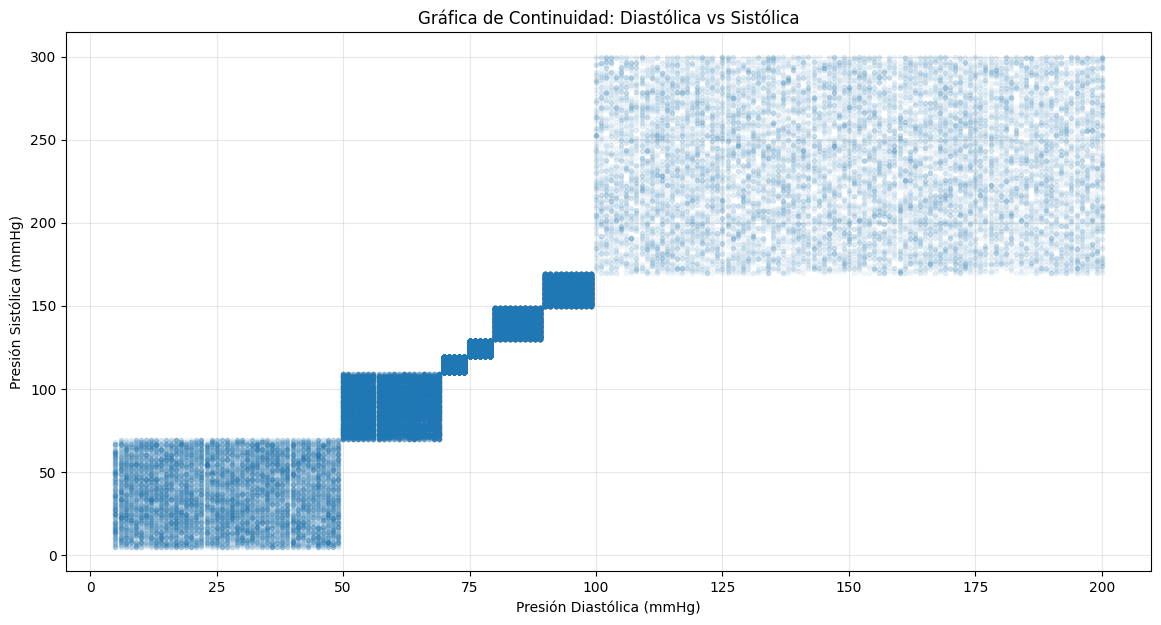

In [10]:
#Gráfica de continuidad
diastolica = np.array(datos['diastolic_pressure'])

plt.figure(figsize=(14, 7))
plt.plot(diastolica, systole, 'o', alpha=0.05, markersize=3)
plt.title('Gráfica de Continuidad: Diastólica vs Sistólica')
plt.xlabel('Presión Diastólica (mmHg)')
plt.ylabel('Presión Sistólica (mmHg)')
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
#Correlación específica
correlacion = datos['medicine_type'].corr(datos['systolic_pressure'],
                                           method='pearson')
print(f'Correlación Pearson (medicina vs presión): {correlacion:.4f}')

# Interpretación
if abs(correlacion) < 0.3:
    print("Interpretación: Correlación DÉBIL")
elif abs(correlacion) < 0.7:
    print("Interpretación: Correlación MODERADA")
else:
    print("Interpretación: Correlación FUERTE")

Correlación Pearson (medicina vs presión): 0.0007
Interpretación: Correlación DÉBIL


=== MATRIZ DE CORRELACIÓN ===
                    id_branch  medicine_type  medicine_quantity  \
id_branch            1.000000       0.003931          -0.002111   
medicine_type        0.003931       1.000000          -0.003081   
medicine_quantity   -0.002111      -0.003081           1.000000   
systolic_pressure    0.006480       0.000684          -0.003965   
diastolic_pressure   0.004708       0.000250          -0.005308   

                    systolic_pressure  diastolic_pressure  
id_branch                    0.006480            0.004708  
medicine_type                0.000684            0.000250  
medicine_quantity           -0.003965           -0.005308  
systolic_pressure            1.000000            0.899602  
diastolic_pressure           0.899602            1.000000  


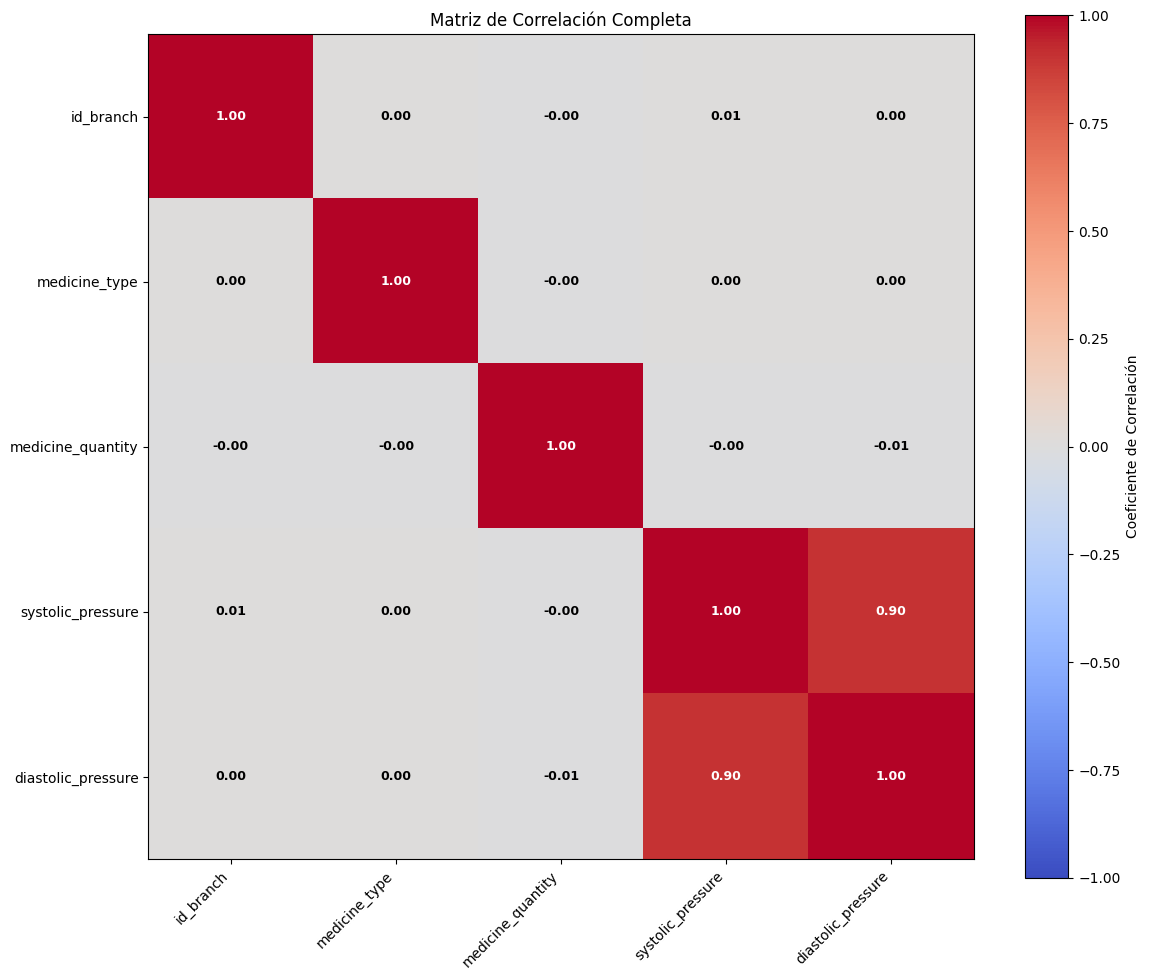

In [14]:
#Matriz de correlación
# Select only numeric columns for correlation calculation
numeric_datos = datos.select_dtypes(include=np.number)

corr_matrix = numeric_datos.corr(method='pearson')
print("=== MATRIZ DE CORRELACIÓN ===")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(12, 10))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, label='Coeficiente de Correlación')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matriz de Correlación Completa')

# Valores en las celdas
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        valor = corr_matrix.iloc[i, j]
        color = 'white' if abs(valor) > 0.5 else 'black'
        plt.text(j, i, f'{valor:.2f}', ha='center', va='center',
                color=color, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
#